In [41]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np

## Leitura dos dados coletados e formação do DataFrame


In [4]:
df_info_dados = pd.read_csv('../ProjetoRedes/assets/valorant.csv', index_col=False)
df_info_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36994 entries, 0 to 36993
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          36994 non-null  int64  
 1   Time         36994 non-null  float64
 2   Source       36994 non-null  object 
 3   Destination  36994 non-null  object 
 4   Protocol     36994 non-null  object 
 5   Length       36994 non-null  int64  
 6   Info         36994 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.0+ MB


In [5]:
df_info_dados

,No.,Time,Source,Destination,Protocol,Length,Info
0,3,0.396319,192.168.0.111,63.251.140.21,UDP,74,18334 > 27024 Len=32
1,7,1.064562,192.168.0.111,162.247.241.1,TCP,54,[TCP ACKed unseen segment] 50192 > 443 [ACK]...
2,8,1.298275,192.168.0.111,224.0.0.252,IGMPv2,46,Membership Report group 224.0.0.252
3,9,1.298344,192.168.0.111,224.0.0.251,IGMPv2,46,Membership Report group 224.0.0.251
4,10,1.298370,192.168.0.111,239.255.255.250,IGMPv2,46,Membership Report group 239.255.255.250
...,...,...,...,...,...,...,...
36989,101605,635.194962,192.168.0.111,162.247.241.1,TLSv1.3,571,Client Hello
36990,101610,635.249505,192.168.0.111,162.247.241.1,TCP,54,50912 > 443 [ACK] Seq=518 Ack=3456 Win=13235...
36991,101611,635.252922,192.168.0.111,162.247.241.1,TLSv1.3,118,"Change Cipher Spec, Application Data"
36992,101612,635.254344,192.168.0.111,162.247.241.1,TLSv1.3,1897,Application Data


In [6]:
df_info_dados.shape

(36994, 7)

In [7]:
df_info_dados.isnull().sum()

No.            0
Time           0
Source         0
Destination    0
Protocol       0
Length         0
Info           0
dtype: int64

Plot por tipos de Protocolos 

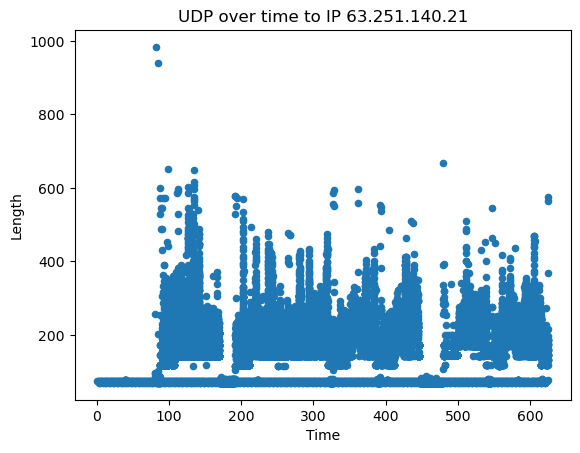

In [8]:
df_info_dados[df_info_dados['Protocol'] == 'UDP'].plot(kind='scatter', x='Time', y='Length', title='UDP over time to IP 63.251.140.21')

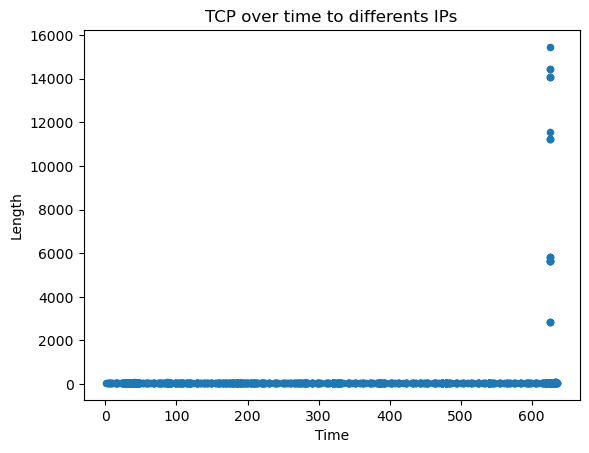

In [9]:
df_info_dados[df_info_dados['Protocol'] == 'TCP'].plot(kind='scatter', x='Time', y='Length', title='TCP over time to differents IPs')

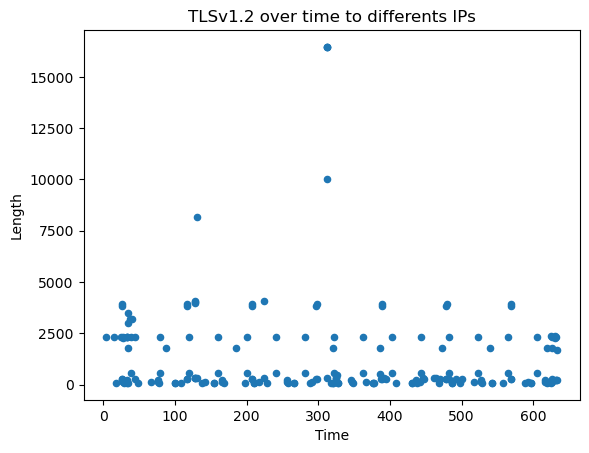

In [10]:
df_info_dados[df_info_dados['Protocol'] == 'TLSv1.2'].plot(kind='scatter', x='Time', y='Length', title='TLSv1.2 over time to differents IPs')

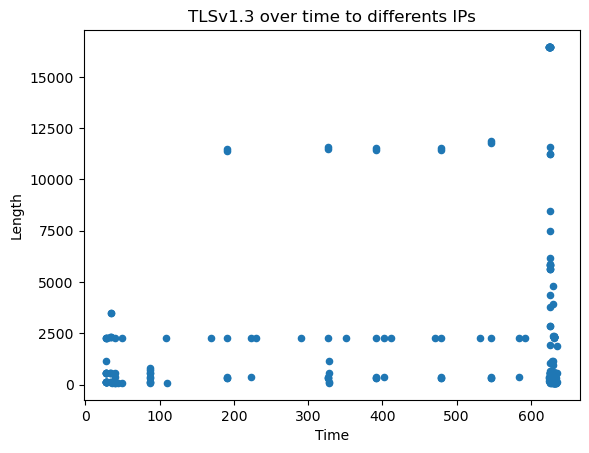

In [11]:
df_info_dados[df_info_dados['Protocol'] == 'TLSv1.3'].plot(kind='scatter', x='Time', y='Length', title='TLSv1.3 over time to differents IPs')

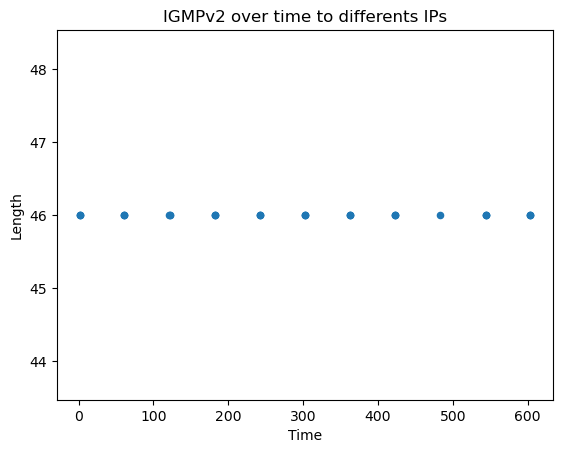

In [12]:
df_info_dados[df_info_dados['Protocol'] == 'IGMPv2'].plot(kind='scatter', x='Time', y='Length', title='IGMPv2 over time to differents IPs')

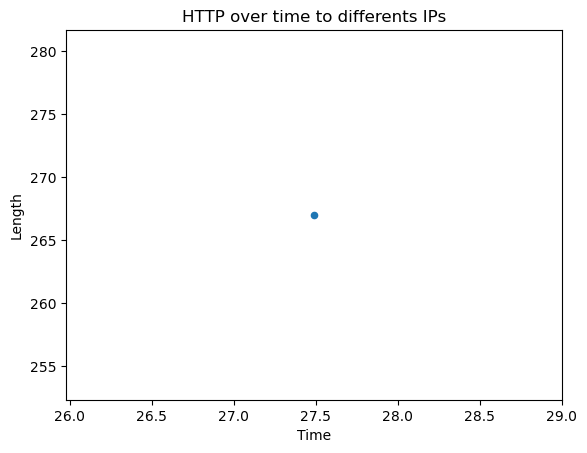

In [13]:
df_info_dados[df_info_dados['Protocol'] == 'HTTP'].plot(kind='scatter', x='Time', y='Length', title='HTTP over time to differents IPs')

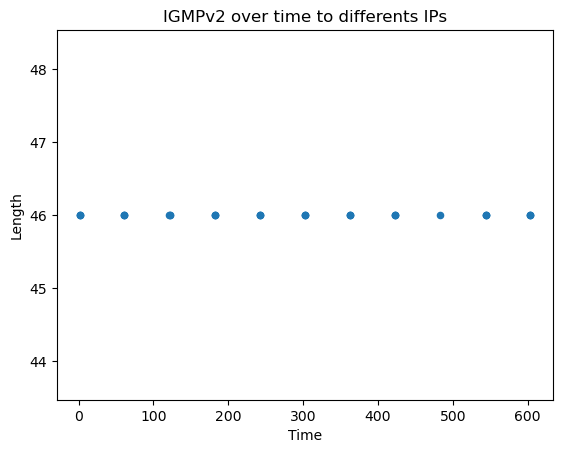

In [14]:
df_info_dados[df_info_dados['Protocol'] == 'IGMPv2'].plot(kind='scatter', x='Time', y='Length', title='IGMPv2 over time to differents IPs')

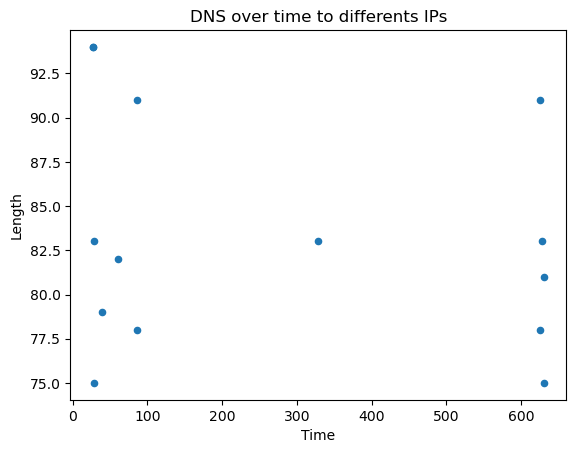

In [15]:
df_info_dados[df_info_dados['Protocol'] == 'DNS'].plot(kind='scatter', x='Time', y='Length', title='DNS over time to differents IPs')

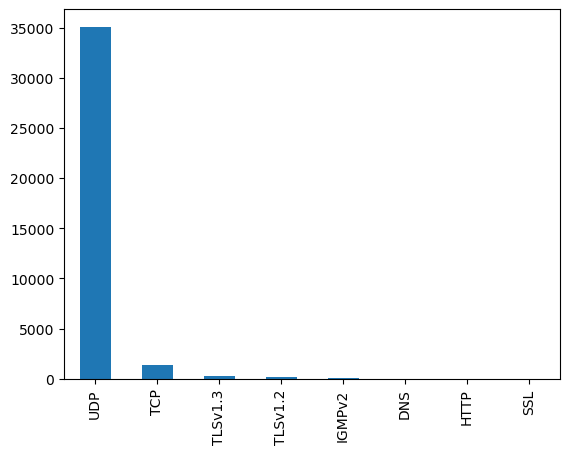

In [44]:
df_info_dados['Protocol'].value_counts().plot(kind='bar')